In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

#Filtering the data to get the desired range
#Grouping the data using hourly timestamp and forward filling the NULL values

import datetime, pytz

def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

data = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv',parse_dates=[0], date_parser=dateparse) 
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
drop_row = data[ (data['Timestamp'] >= '2020-06-01 00:00:00') ].index
data.drop(drop_row, inplace = True)
drop_row = data[ (data['Timestamp'] < '2017-05-01 00:00:00')].index
data.drop(drop_row, inplace = True)



data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)
data.head()
X1 = np.array(data.index)
X2 = np.array(data.iloc[:,0])
X1=X1.reshape(-1,1)
X2=X2.reshape(-1,1)

In [2]:
from sklearn.model_selection import train_test_split
input_vec_train,input_vec_test,output_label_y_train,output_label_y_test = train_test_split(X1,X2,test_size=0.1,random_state=0)

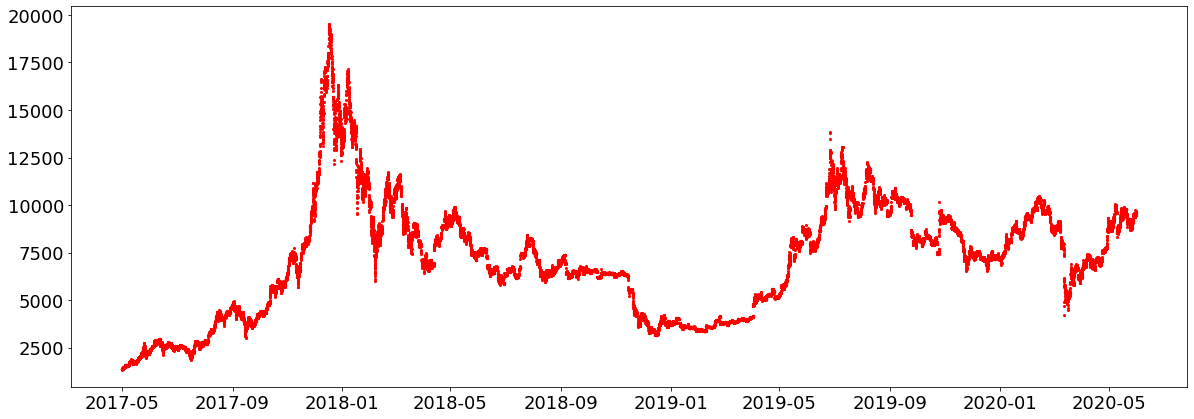

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[20, 7])
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(input_vec_train, output_label_y_train, color='red', marker='.', linewidth=0.1)

In [4]:
from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(input_vec_train)
# y = sc_y.fit_transform(output_label_y_train)
# regressor = SVR(kernel = 'rbf', C=1e4, gamma=0.1)
regressor = SVR(kernel = 'rbf')
regressor.fit(input_vec_train,  np.ravel(output_label_y_train,order='C'))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [5]:
y_pred1 = regressor.predict(input_vec_test)
# y_pred = sc_y.inverse_transform(y_pred1) 

In [8]:
from math import sqrt
from sklearn import metrics
RMSE = sqrt(metrics.mean_squared_error( output_label_y_test, y_pred1)) 
print('RMSE value of the SVR Model is:', RMSE)


MAPE = np.mean(np.abs((output_label_y_test - y_pred1)/output_label_y_test))*100
print('MAPE value of the SVR Model is:', MAPE)

print("Accuracy:",regressor.score(input_vec_test, output_label_y_test))

RMSE value of the SVR Model is: 2593.8423337399076
MAPE value of the SVR Model is: 46.87638323127624
Accuracy: 0.24459039443645658


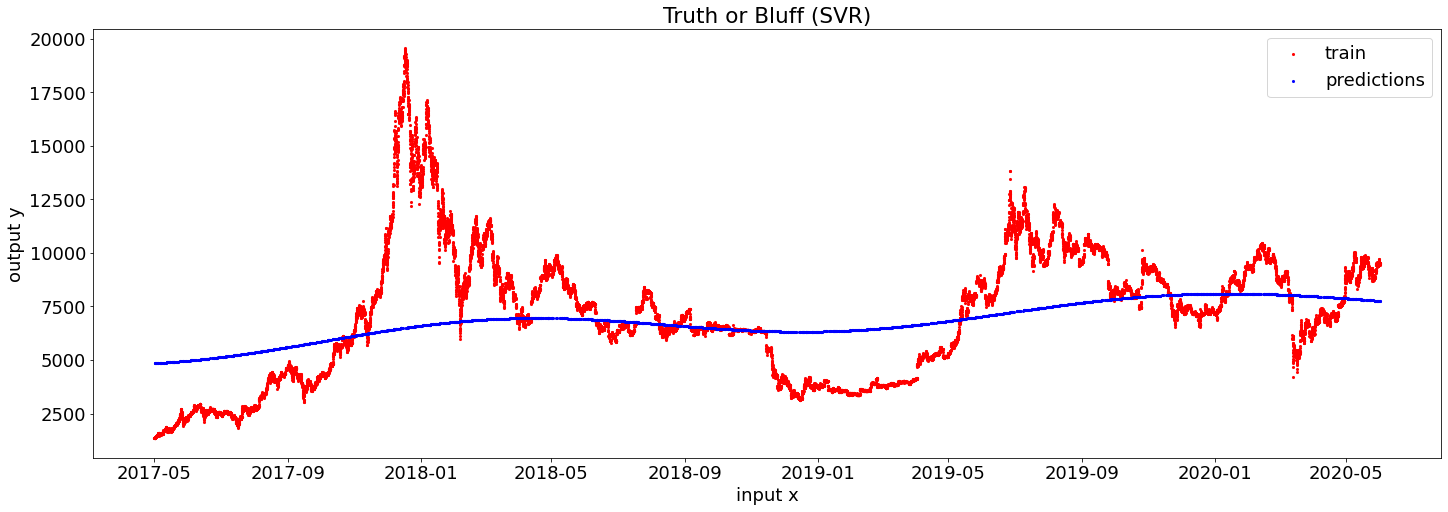

In [10]:
# X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
# X_grid = X_grid.reshape((len(X_grid), 1))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[20, 7])
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
# plt.scatter(X, y, color = 'red',marker='.', linewidth=0.1)
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue', marker='.', linewidth=0.1)

plt.scatter(input_vec_train, output_label_y_train, color='red', marker='.', linewidth=0.1)
plt.scatter(input_vec_test, y_pred1, color='blue', marker='.', linewidth=0.1)

plt.title('Truth or Bluff (SVR)')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(['train','predictions'])
plt.show()



In [12]:
# Cross Validation using 10 KFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(input_vec_train):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = input_vec_train,input_vec_test,output_label_y_train,output_label_y_test
    best_svr.fit(X_train, np.ravel(y_train,order='C'))
    scores.append(best_svr.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Train Index:  [ 2435  2436  2437 ... 24340 24341 24342] 

Test Index:  [   0    1    2 ... 2432 2433 2434]
Train Index:  [    0     1     2 ... 24340 24341 24342] 

Test Index:  [2435 2436 2437 ... 4867 4868 4869]
Train Index:  [    0     1     2 ... 24340 24341 24342] 

Test Index:  [4870 4871 4872 ... 7302 7303 7304]
Train Index:  [    0     1     2 ... 24340 24341 24342] 

Test Index:  [7305 7306 7307 ... 9736 9737 9738]
Train Index:  [    0     1     2 ... 24340 24341 24342] 

Test Index:  [ 9739  9740  9741 ... 12170 12171 12172]
Train Index:  [    0     1     2 ... 24340 24341 24342] 

Test Index:  [12173 12174 12175 ... 14604 14605 14606]
Train Index:  [    0     1     2 ... 24340 24341 24342] 

Test Index:  [14607 14608 14609 ... 17038 17039 17040]
Train Index:  [    0     1     2 ... 24340 24341 24342] 

Test Index:  [17041 17042 17043 ... 19472 19473 19474]
Train Index:  [    0     1     2 ... 24340 24341 24342] 

Test Index:  [19475 19476 19477 ... 21906 21907 21908]
Train I

In [14]:
print("Average scrore: ",np.mean(scores))
print("All scrores: ",scores)

Average scrore:  0.24459039443645655
All scrores:  [0.24459039443645658, 0.24459039443645658, 0.24459039443645658, 0.24459039443645658, 0.24459039443645658, 0.24459039443645658, 0.24459039443645658, 0.24459039443645658, 0.24459039443645658, 0.24459039443645658]
